In [1]:
import numpy as np
import pandas as pd

In [2]:
import json

In [3]:
import requests

In [4]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [5]:
from sklearn.cluster import KMeans

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.



In [7]:
import folium

In [8]:
from sklearn.cluster import KMeans 

In [9]:
from geopy.geocoders import Nominatim

In [10]:
!pip install wikipedia

In [11]:
import wikipedia as wk

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
from pandas.io.json import json_normalize

In [14]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [15]:
!pip install lxml

In [16]:
!pip install html5lib

In [17]:
!pip install BeautifulSoup4

In [18]:
webpage = wk.page("List of postal codes of Canada: M").html().encode("UTF-8")

In the above cell i used Wikipedia Api to get html source

In [19]:
df = pd.read_html(webpage)[0]

I use the pandas read html with the html source and convert into to a dataframe in csv format

In [20]:
df.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [21]:
df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [22]:
indexnames = df[df['Borough']=="Not assigned"].index

In [23]:
df1 =df.drop(indexnames)

I drop all the rows with not assigned in the borough column

In [24]:
df1

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [25]:
df1 = df1.reset_index(drop=True)

Finally i have reindexed the dataframe.

In [26]:
df1

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [27]:
df1.shape

(103, 3)

In [28]:
geodata = pd.read_csv("https://cocl.us/Geospatial_data")

In [29]:
finaldf = df1.join(geodata.set_index('Postal Code'), on='Postal Code')

Using the CSV data provided i join the 2 dataframes into one with postal code as index

In [30]:
finaldf

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [31]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [32]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(finaldf['Latitude'], finaldf['Longitude'], finaldf['Borough'], finaldf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

I generate maps to visualize the neighborhoods and how they cluster together.

In [33]:
map_toronto

In [34]:
CLIENT_ID = '0KDNWZ2JFIGU4YMAKHS3UJWNVPMTPLTMCJQA5ZIWBK5KMG5C' # your Foursquare ID
CLIENT_SECRET = 'SLEK0RMBESEP0CA5XCGE4WIMUIRBG1R3JAGEDB4GDMXCHHO2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0KDNWZ2JFIGU4YMAKHS3UJWNVPMTPLTMCJQA5ZIWBK5KMG5C
CLIENT_SECRET:SLEK0RMBESEP0CA5XCGE4WIMUIRBG1R3JAGEDB4GDMXCHHO2


In [35]:
query= "Indian"
radius=25000

In [36]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId=4bf58dd8d48988d10f941735'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0KDNWZ2JFIGU4YMAKHS3UJWNVPMTPLTMCJQA5ZIWBK5KMG5C&client_secret=SLEK0RMBESEP0CA5XCGE4WIMUIRBG1R3JAGEDB4GDMXCHHO2&ll=43.6534817,-79.3839347&v=20180604&query=Indian&radius=25000&limit=100&categoryId=4bf58dd8d48988d10f941735'

In [37]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5ed6036240a7ea001bc7e477'},
 'response': {'venues': [{'id': '4ad4c060f964a5206ff720e3',
    'name': '309 Dhaba Indian Excellence',
    'location': {'address': '309 King Street West',
     'lat': 43.64639421226189,
     'lng': -79.39041811187568,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64639421226189,
       'lng': -79.39041811187568}],
     'distance': 946,
     'postalCode': 'M5V 1J5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['309 King Street West',
      'Toronto ON M5V 1J5',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591084339',
    'hasPerk': False},
   {'id': '4aef8854f

In [38]:
venues = result['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id,location.neighborhood
0,4ad4c060f964a5206ff720e3,309 Dhaba Indian Excellence,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591084339,False,309 King Street West,43.646394,-79.390418,"[{'label': 'display', 'lat': 43.64639421226189...",946,M5V 1J5,CA,Toronto,ON,Canada,"[309 King Street West, Toronto ON M5V 1J5, Can...",NaN,NaN,NaN
1,4aef8854f964a5201cd921e3,Aroma Fine Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591084339,False,287 King St. W,43.646463,-79.389644,"[{'label': 'display', 'lat': 43.64646252150344...",906,M5V 1J5,CA,Toronto,ON,Canada,"[287 King St. W (at John St.), Toronto ON M5V ...",at John St.,NaN,NaN
2,4b2a634af964a52020a824e3,Indian Flavour,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591084339,False,123 Dundas St W,43.655649,-79.384119,"[{'label': 'display', 'lat': 43.65564910619165...",241,NaN,CA,Toronto,ON,Canada,"[123 Dundas St W (btw Elizabeth & Bay), Toront...",btw Elizabeth & Bay,NaN,NaN
3,4afd920ff964a520ad2822e3,Indian Biriyani House,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591084339,False,181 Dundas St W,43.655120,-79.386645,"[{'label': 'display', 'lat': 43.65511996683289...",284,M5G 1C7,CA,Toronto,ON,Canada,"[181 Dundas St W (W of Chestnut St), Toronto O...",W of Chestnut St,NaN,NaN
4,4fea497c121d2480d3579412,Indian Biriyani House,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591084339,False,120 Adelaide Street West,43.650050,-79.380662,"[{'label': 'display', 'lat': 43.65005028051833...",464,M5H 3V1,CA,Toronto,ON,Canada,"[120 Adelaide Street West (at Bay Street), Tor...",at Bay Street,NaN,NaN


In [39]:
df = dataframe[['name','location.lat','location.lng','location.postalCode','location.city']]

In [40]:
df

,name,location.lat,location.lng,location.postalCode,location.city
0,309 Dhaba Indian Excellence,43.646394,-79.390418,M5V 1J5,Toronto
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,M5V 1J5,Toronto
2,Indian Flavour,43.655649,-79.384119,NaN,Toronto
3,Indian Biriyani House,43.655120,-79.386645,M5G 1C7,Toronto
4,Indian Biriyani House,43.650050,-79.380662,M5H 3V1,Toronto
5,Mami's Indian Cuisine,43.656986,-79.385840,M5G 2N2,Toronto
6,Joe's Indian Restaurant,43.658150,-79.381563,NaN,NaN
7,Ram's Indian kitchen,43.648026,-79.379819,M5L 1E2,Toronto
8,Touch - Indian Cuisine,43.649869,-79.378218,NaN,Toronto
9,Jodpore Club Indian Cuisine,43.655946,-79.393504,NaN,Toronto


In [41]:
indexs=df[df['location.city']!='Toronto'].index

In [42]:
indexs

Int64Index([6, 14, 20, 36, 40, 47], dtype='int64')

In [43]:
newdf=df.drop(indexs)

In [44]:
newdf

,name,location.lat,location.lng,location.postalCode,location.city
0,309 Dhaba Indian Excellence,43.646394,-79.390418,M5V 1J5,Toronto
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,M5V 1J5,Toronto
2,Indian Flavour,43.655649,-79.384119,NaN,Toronto
3,Indian Biriyani House,43.655120,-79.386645,M5G 1C7,Toronto
4,Indian Biriyani House,43.650050,-79.380662,M5H 3V1,Toronto
5,Mami's Indian Cuisine,43.656986,-79.385840,M5G 2N2,Toronto
7,Ram's Indian kitchen,43.648026,-79.379819,M5L 1E2,Toronto
8,Touch - Indian Cuisine,43.649869,-79.378218,NaN,Toronto
9,Jodpore Club Indian Cuisine,43.655946,-79.393504,NaN,Toronto
10,Indian Roti House,43.664382,-79.380468,NaN,Toronto


In [45]:
finaldf=newdf.dropna()

In [46]:
finaldf

,name,location.lat,location.lng,location.postalCode,location.city
0,309 Dhaba Indian Excellence,43.646394,-79.390418,M5V 1J5,Toronto
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,M5V 1J5,Toronto
3,Indian Biriyani House,43.655120,-79.386645,M5G 1C7,Toronto
4,Indian Biriyani House,43.650050,-79.380662,M5H 3V1,Toronto
5,Mami's Indian Cuisine,43.656986,-79.385840,M5G 2N2,Toronto
7,Ram's Indian kitchen,43.648026,-79.379819,M5L 1E2,Toronto
11,Chadani Indian Cuisine,43.649153,-79.374814,M5E 0B7,Toronto
12,Tamarind: The Indian Kitchen,43.646859,-79.378707,M5J 2S1,Toronto
13,Indian Roti House,43.639060,-79.385422,M5J 1B5,Toronto
15,Spice Indian Bistro,43.653948,-79.369143,M5A 2R3,Toronto


In [47]:
finaldf.reset_index(drop=True,inplace=True)

In [48]:
finaldf

,name,location.lat,location.lng,location.postalCode,location.city
0,309 Dhaba Indian Excellence,43.646394,-79.390418,M5V 1J5,Toronto
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,M5V 1J5,Toronto
2,Indian Biriyani House,43.655120,-79.386645,M5G 1C7,Toronto
3,Indian Biriyani House,43.650050,-79.380662,M5H 3V1,Toronto
4,Mami's Indian Cuisine,43.656986,-79.385840,M5G 2N2,Toronto
5,Ram's Indian kitchen,43.648026,-79.379819,M5L 1E2,Toronto
6,Chadani Indian Cuisine,43.649153,-79.374814,M5E 0B7,Toronto
7,Tamarind: The Indian Kitchen,43.646859,-79.378707,M5J 2S1,Toronto
8,Indian Roti House,43.639060,-79.385422,M5J 1B5,Toronto
9,Spice Indian Bistro,43.653948,-79.369143,M5A 2R3,Toronto


In [51]:
import seaborn as sns; sns.set()
import csv
import matplotlib.pyplot as plt

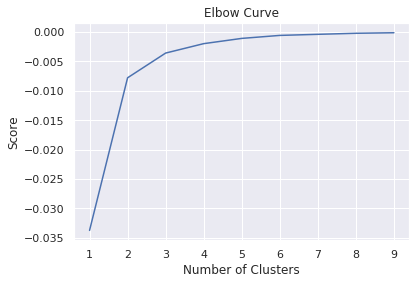

In [52]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = finaldf[['location.lat']]
X_axis = finaldf[['location.lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(finaldf[finaldf.columns[1:3]]) # Compute k-means clustering.
finaldf['cluster_label'] = kmeans.fit_predict(finaldf[finaldf.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(finaldf[finaldf.columns[1:3]]) # Labels of each point
finaldf

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,location.lat,location.lng,location.postalCode,location.city,cluster_label
0,309 Dhaba Indian Excellence,43.646394,-79.390418,M5V 1J5,Toronto,2
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,M5V 1J5,Toronto,2
2,Indian Biriyani House,43.655120,-79.386645,M5G 1C7,Toronto,2
3,Indian Biriyani House,43.650050,-79.380662,M5H 3V1,Toronto,2
4,Mami's Indian Cuisine,43.656986,-79.385840,M5G 2N2,Toronto,2
5,Ram's Indian kitchen,43.648026,-79.379819,M5L 1E2,Toronto,2
6,Chadani Indian Cuisine,43.649153,-79.374814,M5E 0B7,Toronto,2
7,Tamarind: The Indian Kitchen,43.646859,-79.378707,M5J 2S1,Toronto,2
8,Indian Roti House,43.639060,-79.385422,M5J 1B5,Toronto,2
9,Spice Indian Bistro,43.653948,-79.369143,M5A 2R3,Toronto,2


In [54]:
centers

array([[ 43.66292902, -79.45178867],
       [ 43.70318562, -79.30567871],
       [ 43.653918  , -79.38198321],
       [ 43.72590655, -79.39594477]])

In [55]:
colors=["#1215db","#db1237","#12db4e","#e1e817"]

In [63]:
maptoronto = folium.Map(location=[latitude, longitude], zoom_start=11.4)
j=0
while j<4:
    lats=centers[j,0]
    longs=centers[j,1]
    colorname= colors[j]
    folium.CircleMarker(
        [lats, longs],
        radius=8,
        popup="Cluster {}".format(j),
        color='blue',
        fill=True,
        fill_color='{}'.format(colorname),
        fill_opacity=0.7,
        parse_html=False).add_to(maptoronto)  
    mark=finaldf[finaldf['cluster_label']==j]
    for ll, lg, name in zip(mark['location.lat'], mark['location.lng'], mark['name']):
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [ll, lg],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='{}'.format(colorname),
            fill_opacity=0.7,
            parse_html=False).add_to(maptoronto)
    j=j+1

In [64]:
maptoronto